# Lab Exercise 1 
## Predicting House prices
### Submitted by: Nigel Haim N. Sebastian

#### Importing 
- When Imported pandas it prompts me that "Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 4.0)"

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [83]:
### Loading and checking the dataset 

In [84]:
data = pd.read_csv("House_Rent_Dataset.csv")
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [86]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

<BarContainer object of 6 artists>

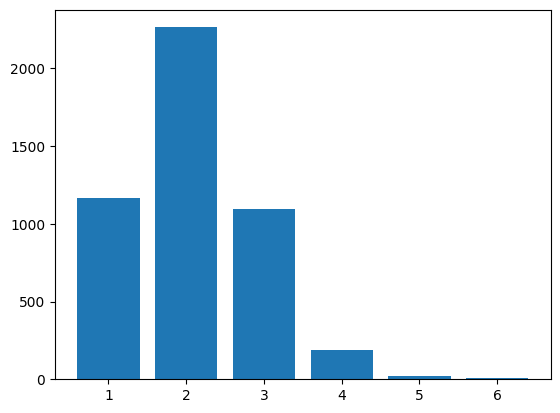

In [87]:
### Data Analysis

plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

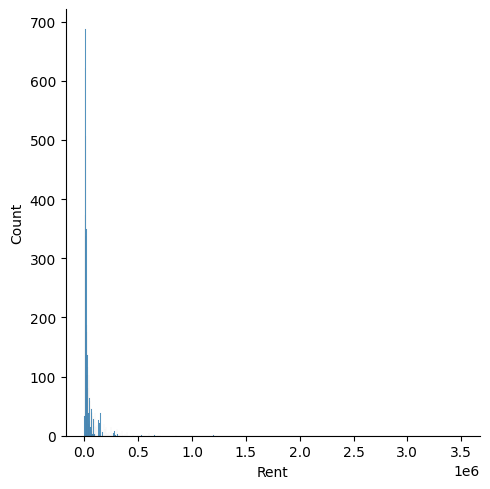

In [88]:
sns.displot(data['Rent'])

In [89]:
data['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [90]:
data['Furnishing Status'].value_counts()


Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [91]:
data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

In [92]:
data['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [93]:
### Conversion of Categorical Variable to One-Hot Encoding

In [94]:
data = data[['BHK', 'Bathroom', 'Furnishing Status', 'Rent']]

In [95]:
def one_hot_encode(data, column):
 encoded = pd.get_dummies(data[column], drop_first= True)
 data = data.drop(column, axis = 1)
 data = data.join(encoded)
 return data

In [96]:
data = one_hot_encode(data, 'Furnishing Status')
data

,BHK,Bathroom,Rent,Semi-Furnished,Unfurnished
0,2,2,10000,False,True
1,2,1,20000,True,False
2,2,1,17000,True,False
3,2,1,10000,False,True
4,2,1,7500,False,True
...,...,...,...,...,...
4741,2,2,15000,True,False
4742,3,3,29000,True,False
4743,3,3,35000,True,False
4744,3,2,45000,True,False


In [97]:
### Training and Test Spill

In [98]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardize

In [100]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modeling 

In [101]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 4410.30368561, 30087.93523131, -8355.90712385, -9036.37919781])

### Quantitative Evaluation

In [102]:
y_preds = model.predict(X_test)

#### The coefficients

In [103]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4410.30368561 30087.93523131 -8355.90712385 -9036.37919781]


#### The mean squared error

In [104]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

Mean squared error: 2693550407.36


#### The coefficient of determination: 1 is perfect prediction


In [105]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficient of determination: 0.32


#### Qualitative Evaluation

In [106]:
sample_data = X.iloc[0]
sample_data
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast
y.iloc[0]

C:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


10000